In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [5]:


df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
# shape

df.shape

(396030, 27)

In [7]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
# describe

df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [9]:
# dtypes

df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [10]:
# null values

# Missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()




,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091


In [11]:
# Numerical Features


#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [12]:
len(numerical_features.columns)

12

In [13]:
### Count of unique values in numerical features
for feature in [feature for feature in df.columns if feature not in ['class']]:
  print("Feature {} has {} No. of unique values".format(feature,df[feature].nunique()))

Feature loan_amnt has 1397 No. of unique values
Feature term has 2 No. of unique values
Feature int_rate has 566 No. of unique values
Feature installment has 55706 No. of unique values
Feature grade has 7 No. of unique values
Feature sub_grade has 35 No. of unique values
Feature emp_title has 173105 No. of unique values
Feature emp_length has 11 No. of unique values
Feature home_ownership has 6 No. of unique values
Feature annual_inc has 27197 No. of unique values
Feature verification_status has 3 No. of unique values
Feature issue_d has 115 No. of unique values
Feature loan_status has 2 No. of unique values
Feature purpose has 14 No. of unique values
Feature title has 48817 No. of unique values
Feature dti has 4262 No. of unique values
Feature earliest_cr_line has 684 No. of unique values
Feature open_acc has 61 No. of unique values
Feature pub_rec has 20 No. of unique values
Feature revol_bal has 55622 No. of unique values
Feature revol_util has 1226 No. of unique values
Feature tota

In [14]:
# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [15]:
len(categorical_features.columns)

15

<AxesSubplot:>

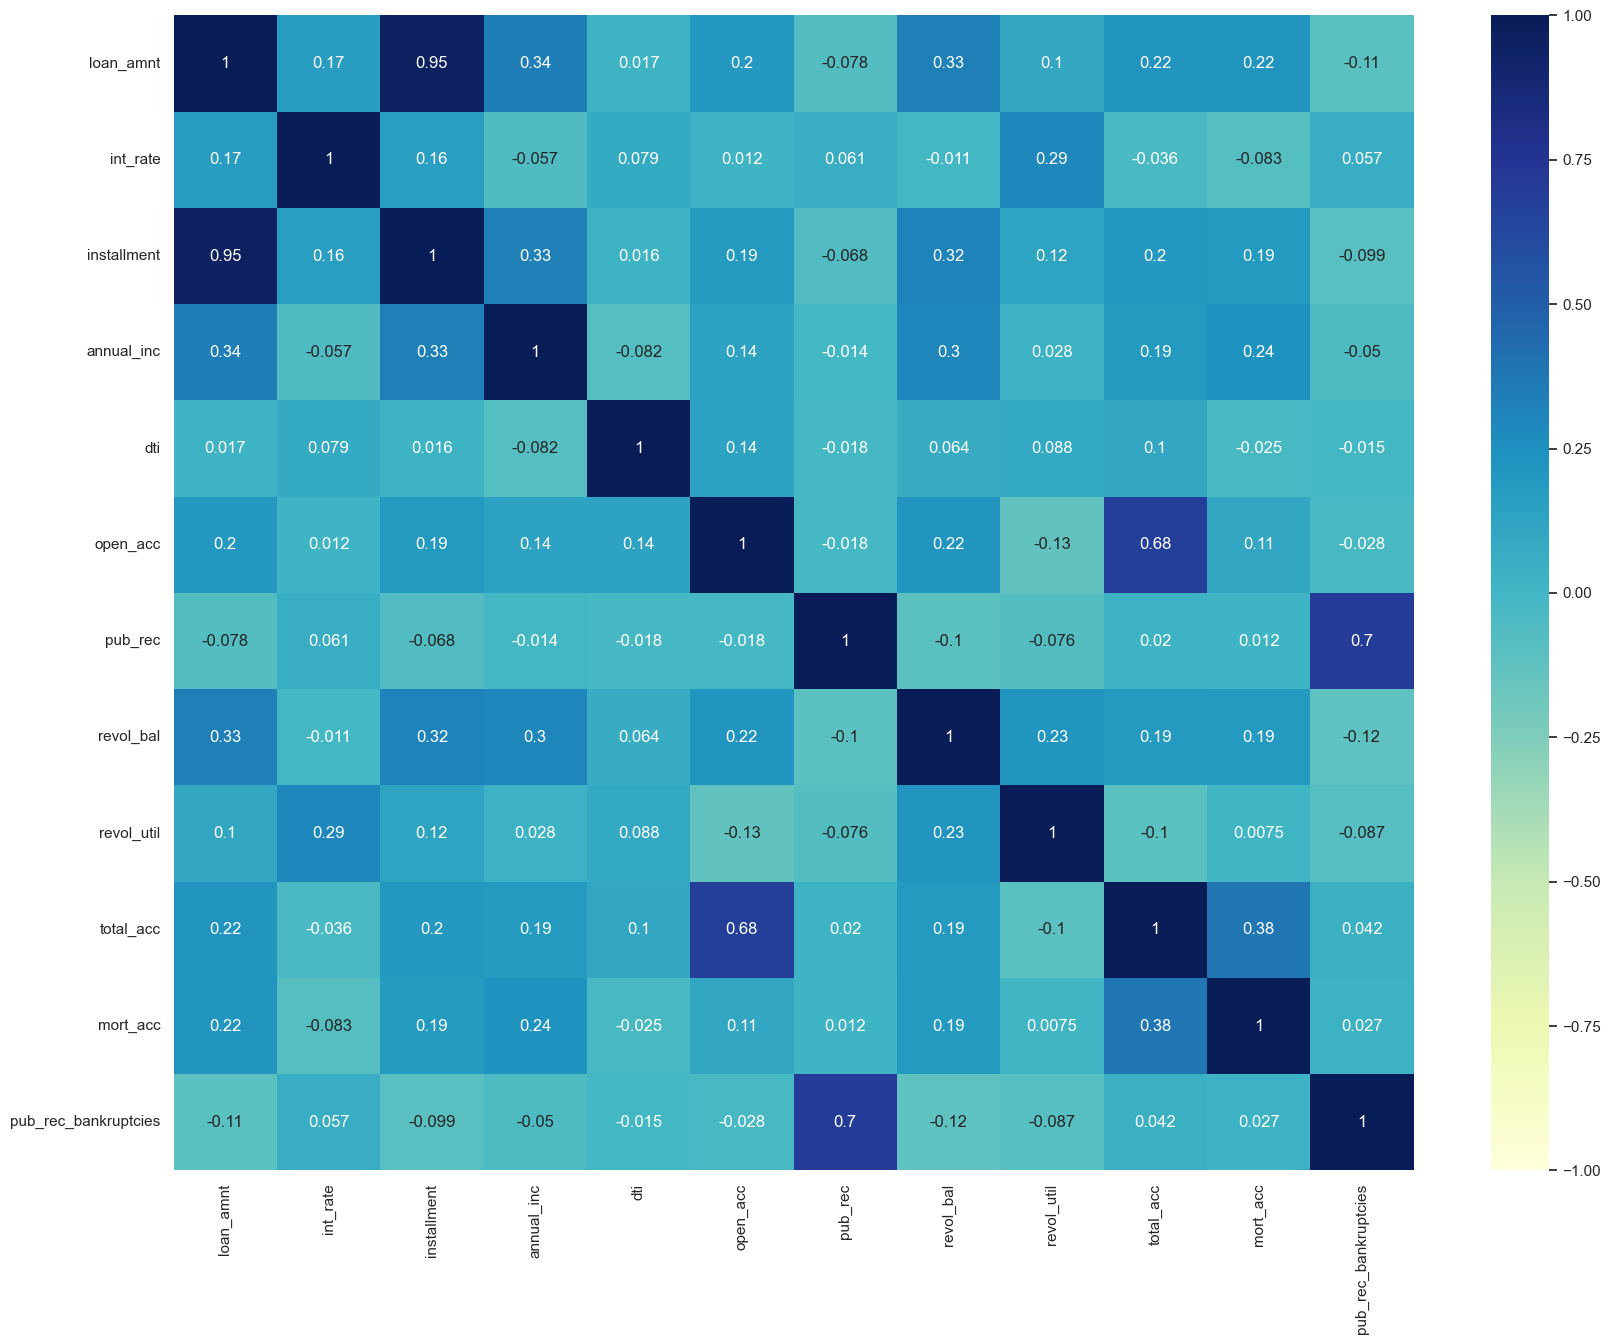

In [16]:
# correlation


# correlation


### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

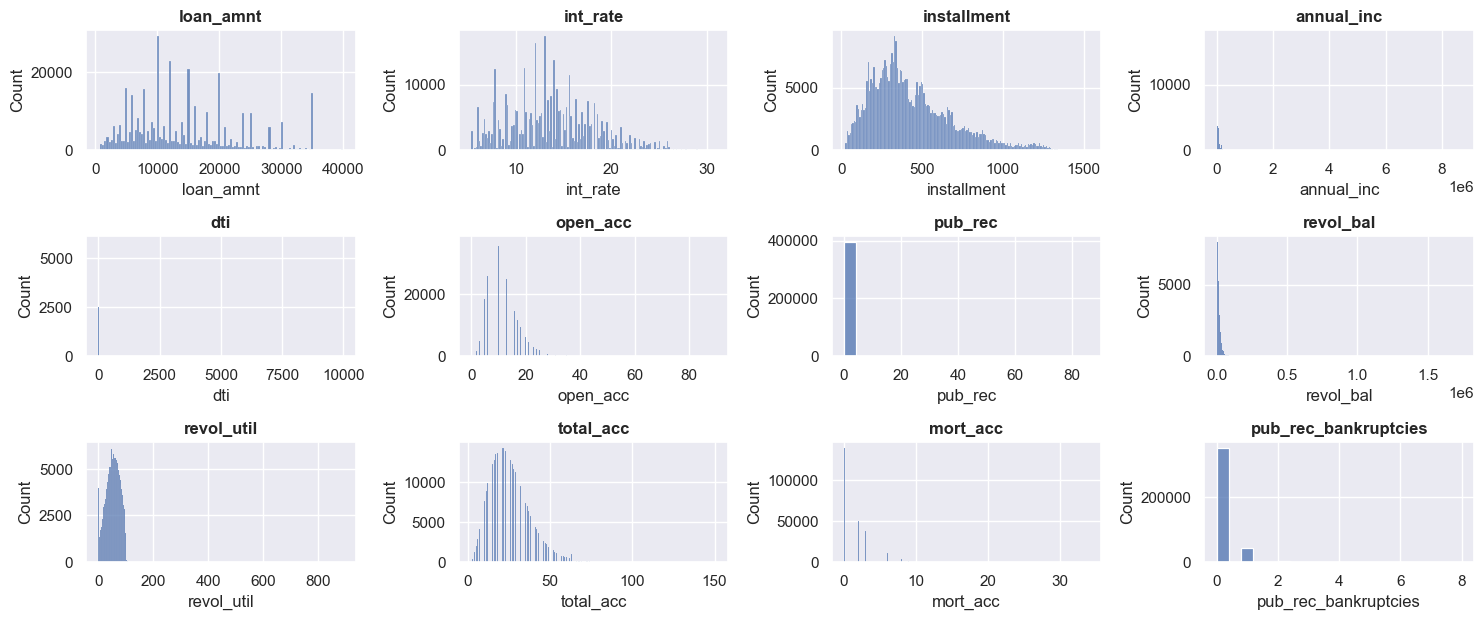

In [17]:
# distribution of numerical variables


plt.figure(figsize=(15,10))
for i in enumerate(numerical_features):
    plt.subplot(5, 4, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=df, x=i[1], palette ='rainbow')
    plt.title("{}".format(i[1]), fontweight="bold")
    plt.tight_layout()
    plt.show

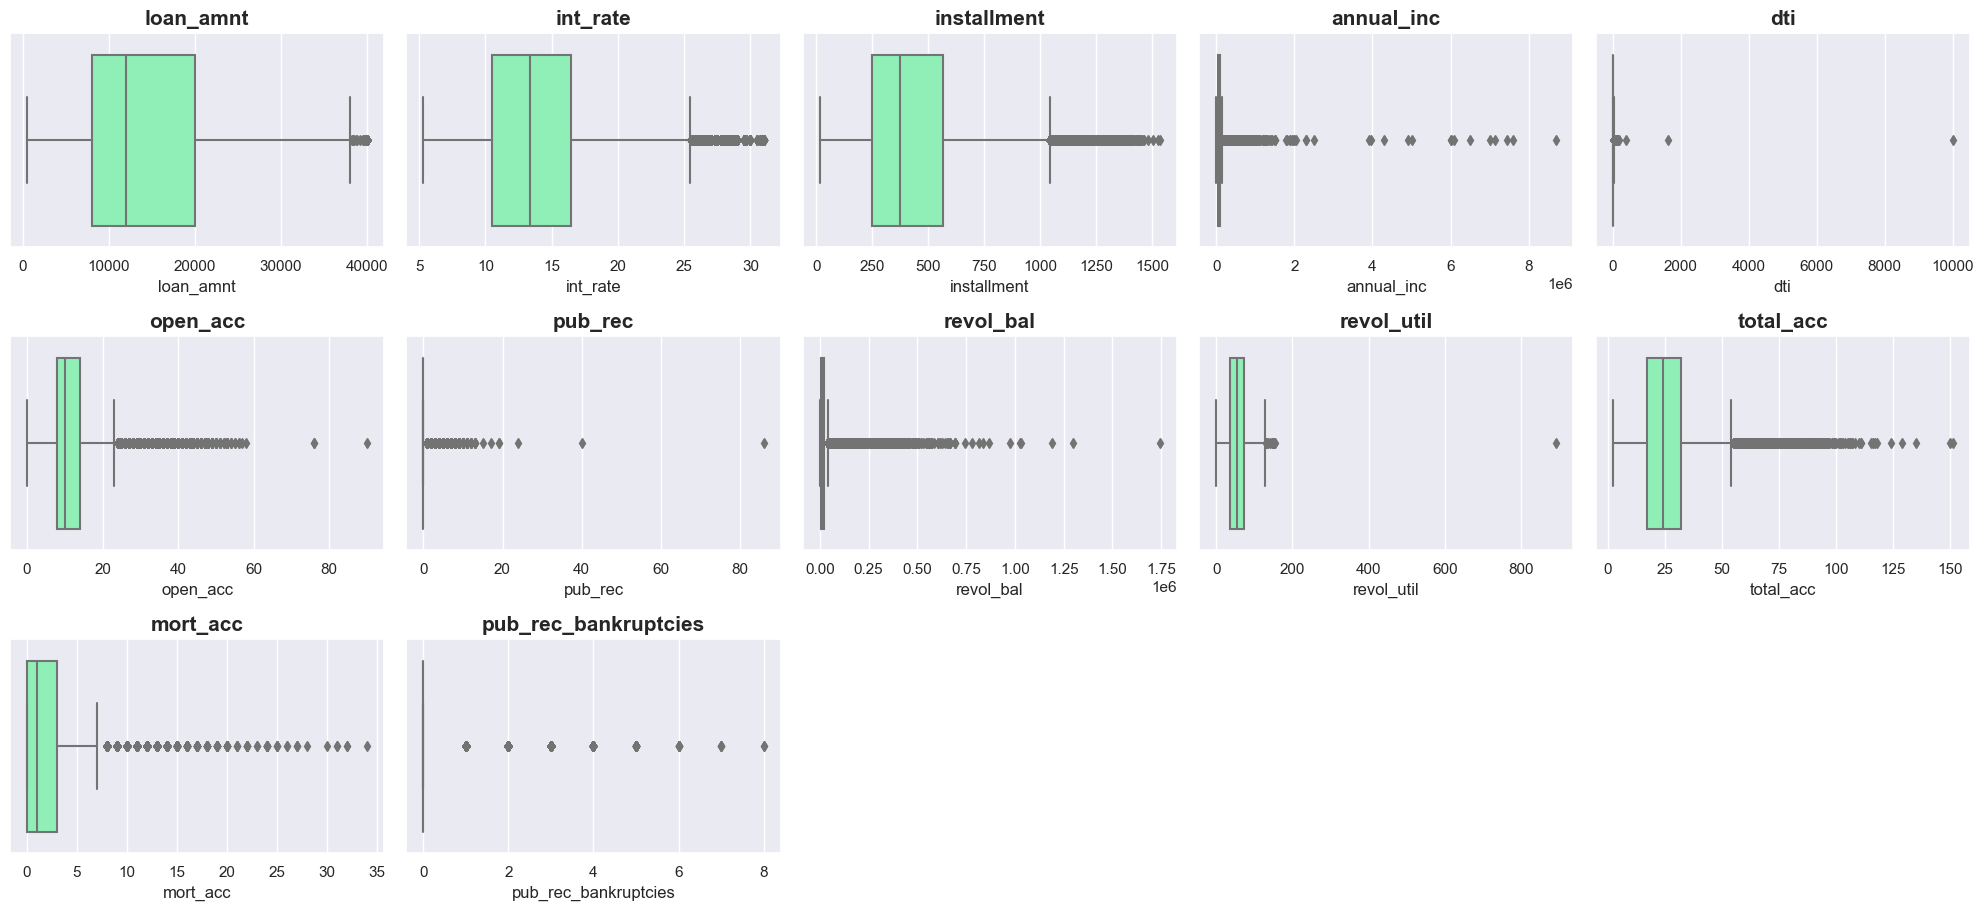

In [18]:
# #outliers

### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(10, 5, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)
    plt.tight_layout()

c:\Users\91822\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


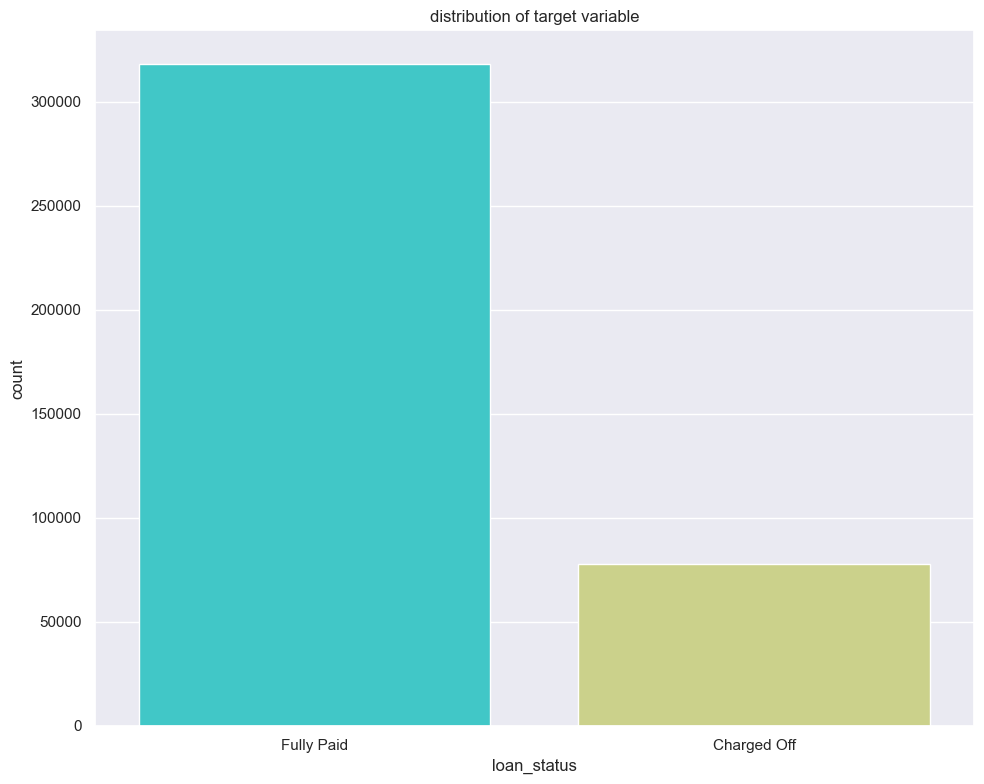

In [19]:
# target columns distribution

plt.figure(figsize=(10,8))
sns.countplot(df['loan_status'],palette = 'rainbow')
plt.title('distribution of target variable')
plt.tight_layout()
plt.show()

In [20]:
# removing correlated variables
# correlation features



def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [21]:
corr_features = correlation(df, 0.75)
len(set(corr_features))
     

1

In [22]:
corr_features

{'installment'}

In [23]:
# null values treatment


total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091


In [24]:
for i in numerical_features:
  df[i].fillna(df[i].median(),inplace = True)

In [25]:
for i in categorical_features:
  df[i].fillna(df[i].mode()[0],inplace = True)

In [26]:
# null values treatment


total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
loan_amnt,0,0.0
title,0,0.0
pub_rec_bankruptcies,0,0.0
mort_acc,0,0.0
application_type,0,0.0


In [27]:
# Categorical features
categorical_features.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [28]:
# term

term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [29]:
df.drop('grade', axis=1, inplace=True)

In [30]:
oe = LabelEncoder()

dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','loan_status']

for i in dummies:
  df[i] = oe.fit_transform(df[i])

In [31]:
df.drop('issue_d', axis=1, inplace=True)

In [32]:
df.drop('emp_title', axis=1, inplace=True)

In [33]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [34]:
df.drop('title', axis=1, inplace=True)

In [35]:
df.drop('emp_length', axis=1, inplace=True)

In [36]:
df.drop('address', axis=1, inplace=True)

In [37]:
# Categorical features
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,8,5,117000.0,0,1,12,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,265.68,9,1,65000.0,0,1,2,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,506.97,7,5,43057.0,1,1,1,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,220.65,1,5,54000.0,0,1,1,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,24375.0,60,17.27,609.33,14,1,55000.0,2,0,1,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0


In [38]:
df.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
sub_grade                 int32
home_ownership            int32
annual_inc              float64
verification_status       int32
loan_status               int32
purpose                   int32
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int32
application_type          int32
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [39]:

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['loan_status']),
                                                 df['loan_status'],
                                                 test_size=0.2,
                                                random_state=23)

In [40]:
X_train.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
11093,16750.0,36,13.66,569.72,12,5,40000.0,0,1,24.93,7.0,0.0,25081.0,81.2,14.0,0,1,0.0,0.0
287384,11000.0,36,18.24,399.01,19,5,50000.0,1,2,10.63,7.0,0.0,3597.0,55.3,7.0,1,1,0.0,0.0
277798,10625.0,36,10.16,343.64,5,1,57324.0,2,2,28.21,11.0,0.0,12085.0,39.4,33.0,0,1,1.0,0.0
147270,12000.0,60,14.64,283.22,12,1,48750.0,0,2,14.13,16.0,0.0,13838.0,51.3,23.0,1,1,2.0,0.0
114802,3000.0,60,11.99,66.72,9,1,64800.0,0,0,4.67,4.0,0.0,0.0,0.0,14.0,0,1,1.0,0.0


In [41]:

y_train.head()

11093     1
287384    1
277798    0
147270    1
114802    1
Name: loan_status, dtype: int32

In [42]:
X_test.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
243692,9800.0,36,13.67,333.38,12,5,38000.0,2,2,25.74,9.0,0.0,4159.0,42.0,20.0,1,1,0.0,0.0
378572,7225.0,36,16.99,257.56,17,1,34368.0,1,2,27.58,8.0,1.0,5451.0,85.0,36.0,1,1,1.0,1.0
342422,10000.0,60,19.99,264.89,23,5,75000.0,1,2,6.21,2.0,0.0,1309.0,72.7,10.0,1,1,0.0,0.0
267127,20000.0,60,13.67,461.96,12,1,78000.0,0,1,26.85,11.0,0.0,28962.0,66.9,31.0,1,1,5.0,0.0
393995,20400.0,60,13.67,471.19,9,1,136771.0,2,2,15.97,16.0,0.0,13872.0,40.8,44.0,1,1,6.0,0.0


In [43]:
y_test.head()

243692    1
378572    1
342422    0
267127    0
393995    1
Name: loan_status, dtype: int32

In [44]:
X_train.shape, y_train.shape

((316824, 19), (316824,))

In [45]:
X_test.shape, y_test.shape

((79206, 19), (79206,))

In [46]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [47]:
X_train=scalar.fit_transform(X_train)
X_train

array([[ 0.31566564, -0.55767814,  0.00486463, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [-0.37195863, -0.55767814,  1.03006813, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [-0.41680369, -0.55767814, -0.77858784, ..., -0.00927666,
        -0.35774638, -0.34172767],
       ...,
       [-1.40040536, -0.55767814,  1.21138142, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [ 2.49812527,  1.79314901, -0.21226363, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [ 0.10339902, -0.55767814, -0.25703234, ..., -0.00927666,
        -0.35774638, -0.34172767]])

In [48]:
X_test=scalar.transform(X_test)
X_test
     

array([[-0.51546282, -0.55767814,  0.00710306, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [-0.82339891, -0.55767814,  0.75026368, ..., -0.00927666,
        -0.35774638,  2.46961268],
       [-0.49154546,  1.79314901,  1.42179437, ..., -0.00927666,
        -0.84464685, -0.34172767],
       ...,
       [ 0.22597552, -0.55767814, -0.14511056, ..., -0.00927666,
        -0.84464685, -0.34172767],
       [ 0.46514918, -0.55767814, -1.42773416, ..., -0.00927666,
        -0.35774638, -0.34172767],
       [-1.11339697,  1.79314901,  2.06198695, ..., -0.00927666,
        -0.35774638, -0.34172767]])

In [49]:
models={
 "Logistic Regression":LogisticRegression(),
 #"Support Vector Classifier":SVC(),
 "Decision Tree Classifier":DecisionTreeClassifier(),
 "Random Forest Classifier":RandomForestClassifier(),
 "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
 "Extra Tree Classifier": ExtraTreesClassifier(),
 "AdaBoost Classifier": AdaBoostClassifier(),
 "GradientBoost Classifier": GradientBoostingClassifier(),
 "XGBoost Classifier": XGBClassifier()
}

In [50]:
def model_trainer(model, X_train_data, y_train_data, X_test_data):
 """
 This function takes model object, X train data, y train data, and 
 X test data as argument, trains model and gives prediction for train data 
 and prediction for test data.
 """
 model.fit(X_train_data, y_train_data)
 y_train_pred=model.predict(X_train_data)
 pred_val=model.predict(X_test_data)
 return y_train_pred, pred_val

In [51]:
def model_evaluator(actual_val, pred_val):

 acc=round(accuracy_score(actual_val, pred_val),5)
 prec=round(precision_score(actual_val, pred_val),5)
 rec=round(recall_score(actual_val, pred_val),5)
 roc_auc=round(roc_auc_score(actual_val, pred_val),5)
 return acc, prec, rec, roc_auc

In [52]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store roc_auc score
roc_auc_list=[]

### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.80589
Precision Score: 0.81468
Recall Score: 0.98212
Roc_Auc Score: 0.53145
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.80207
Precision Score: 0.81137
Recall Score: 0.98113
Roc_Auc Score: 0.53027
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Roc_Auc Score: 1.0
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.70679
Precision Score: 0.82339
Recall Score: 0.8073
Roc_Auc Score: 0.55421
**************************************************


Random Forest Classifier Model

Model Performance for training dataset
Accuracy score: 0.99999
Precision Score: 0.99999
Recall Score: 1.0
Roc_Auc Score: 0.99998
--------------------------------------------------
Model Performa

c:\Users\91822\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Model

Model Performance for training dataset
Accuracy score: 0.81647
Precision Score: 0.82206
Recall Score: 0.98509
Roc_Auc Score: 0.55387
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.80448
Precision Score: 0.81394
Recall Score: 0.98009
Roc_Auc Score: 0.53792
**************************************************




In [53]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Roc_Auc Score']).sort_values(by=['Accuracy'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,Roc_Auc Score
0,XGBoost Classifier,0.80448,0.81394,0.98009,0.53792
1,GradientBoost Classifier,0.80413,0.80937,0.98841,0.52440
2,Random Forest Classifier,0.80291,0.81302,0.97928,0.53517
3,AdaBoost Classifier,0.80288,0.80833,0.98841,0.52126
4,Logistic Regression,0.80207,0.81137,0.98113,0.53027
5,Bagging Classifier,0.80207,0.81139,0.98110,0.53032
6,Extra Tree Classifier,0.80087,0.81247,0.97705,0.53344
7,Decision Tree Classifier,0.70679,0.82339,0.80730,0.55421


In [54]:
xg_init = XGBClassifier()

In [55]:
xg_init.fit(X_train,y_train)

c:\Users\91822\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = xg_init.predict(X_test)

In [57]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

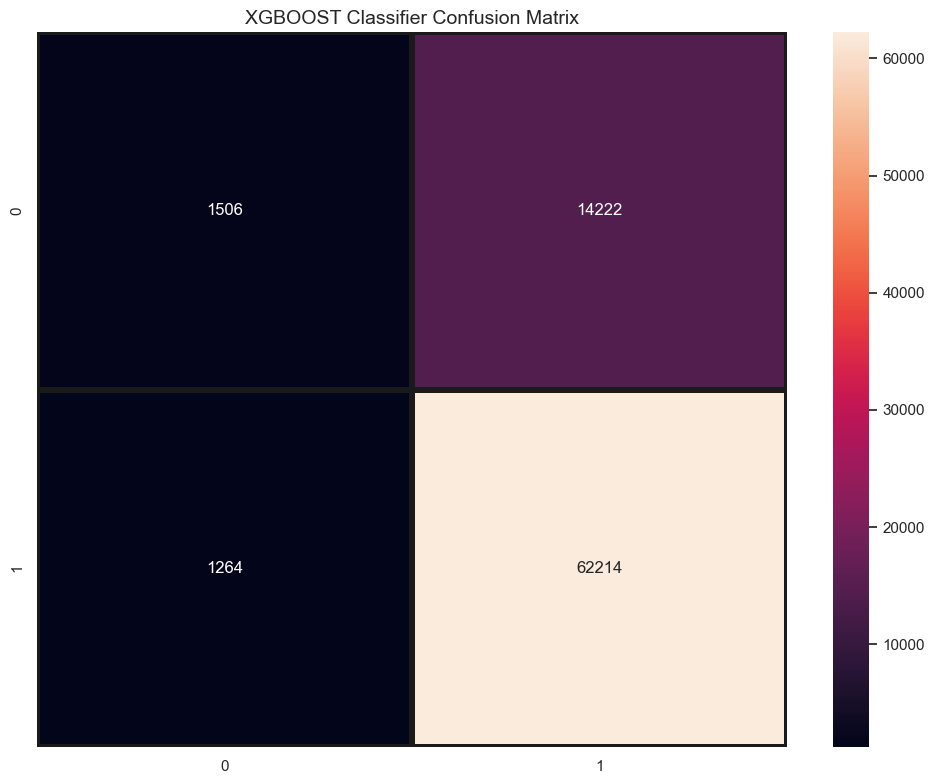

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST Classifier Confusion Matrix",fontsize=14)
plt.tight_layout()
plt.show()

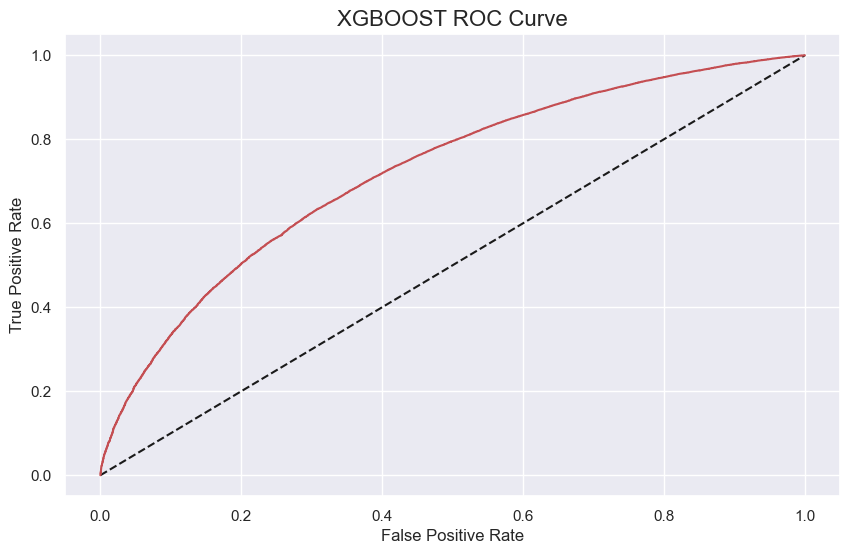

In [60]:
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_prob = xg_init.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOST ROC Curve',fontsize=16)
plt.show();

In [61]:
import pickle

pickle.dump(xg_init,open('rf.pkl','wb'))

In [62]:
pickled_model = pickle.load(open('rf.pkl','rb'))

In [63]:
pickled_model.predict(scalar.transform(X_train[0].reshape(1,-1)))

array([1])

In [64]:
# scaling


pickle.dump(scalar,open('scaler.pkl','wb'))

In [65]:

y_train[0]

1